# Engineering Calculations in Python: A Beginner's Guide

This example runs through a basic Python code snippet for calculating and plotting the shear force and bending moment diagrams for a beam under a uniformly distributed load.
There are many things happening in this example that require an understanding of Python syntax and plotting libraries but the intent is to show you a familiar situation so you can calibrate yourself with what's involved.

I will cover this in more detail when we begin the courses. But there's enough ammo here to begin experimenting with other formulas.

## Step 1: Define Beam Parameters

```python
length = 10  # Length of the beam (m)
w = 10  # Uniformly distributed load in kN/m 
```
These lines set the foundational parameters: the beam's length and the magnitude of the load it carries.

## Step 2: Function Definitions
```python
def shear_force(x):
    return w * (length / 2 - x)  # kN

def bending_moment(x):
    return (w * x / 2) * (length - x)  # kNm
```
Functions to calculate the shear force and bending moment at any point x along the beam, incorporating basic beam theory.  

## Step 3: Maximum Values Calculation

```python
V_max = w * length / 2  # Maximum shear force
M_max = w * length ** 2 / 8  # Maximum bending moment
```
Calculates maximum shear force and bending moment, highlighting the critical points for structural analysis.

## Step 4: Generating Points for Plotting
```python
x_values = np.linspace(0, length, 100)
```

Generates a series of points along the beam to evaluate the shear force and bending moment.

## Step 5: Plotting Diagrams
The plotting is done in two main parts, using matplotlib:

* Shear Force Diagram (SFD)
* Bending Moment Diagram (BMD)
```python
plt.figure(figsize=(12, 6))
```

Sets up the plotting environment.

### SFD Plotting
```python
plt.subplot(1, 2, 1)
plt.plot(x_values, sf_values, label='Shear Force (Vx)', lw=2, color='blue')
plt.fill_between(x_values, 0, sf_values, color='skyblue', alpha=0.5)
plt.axhline(0, color='black', lw=1)  # Beam axis
```
Visualizes shear forces along the beam, with shading for emphasis.

### BMD Plotting
```python
plt.subplot(1, 2, 2)
plt.plot(x_values, bm_values, color='red', label='Bending Moment (Mx)', lw=2)
plt.fill_between(x_values, 0, bm_values, color='salmon', alpha=0.5)
plt.axhline(0, color='black', lw=1)  # Beam axis
```
Illustrates bending moments, similarly enhanced with shading.

## Step 6: Axis and Labels
Each plot is labeled with titles, axis labels, and grids for clarity.

```python
plt.title('Shear Force Diagram (SFD)')
plt.xlabel('Position along the beam (m)')
plt.ylabel('Shear Force (kN)')
plt.grid(True)
plt.legend()
```
Adds informative labels and a legend to the plot.

## Conclusion
This guide demonstrates how Python facilitates engineering calculations, making it easier to visualize complex relationships through graphical representations.



Maximum Shear Force: 50.0 kN
Maximum Bending Moment: 125.0 kNm


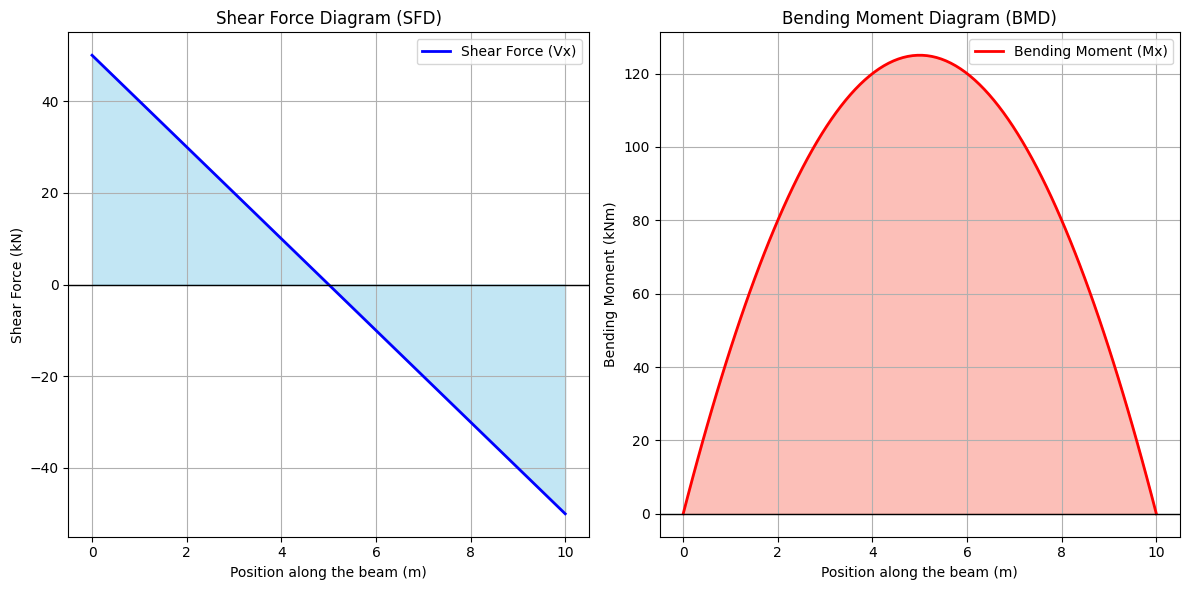

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Beam parameters
length = 10  # Length of the beam (m)
w = 10  # Uniformly distributed load in kN/m 

# Functions
def shear_force(x):
    return w * (length / 2 - x)  # kN

def bending_moment(x):
    return (w * x / 2) * (length - x)  # kNm

# Maximum shear force calculation
V_max = w * length / 2  # The maximum shear force at the ends of the beam

# Maximum bending moment calculation
M_max = w * length ** 2 / 8  # The maximum bending moment at the midpoint of the beam

print(f"Maximum Shear Force: {V_max} kN")
print(f"Maximum Bending Moment: {M_max} kNm")

# Generating points for plotting
x_values = np.linspace(0, length, 100)
sf_values = [shear_force(x) for x in x_values]
bm_values = [bending_moment(x) for x in x_values]

# Plotting SFD
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_values, sf_values, label='Shear Force (Vx)', lw=2, color='blue')
plt.fill_between(x_values, 0, sf_values, color='skyblue', alpha=0.5)
plt.axhline(0, color='black', lw=1)  # Beam axis
plt.title('Shear Force Diagram (SFD)')
plt.xlabel('Position along the beam (m)')
plt.ylabel('Shear Force (kN)')
plt.grid(True)
plt.legend()

# Plotting BMD
plt.subplot(1, 2, 2)
plt.plot(x_values, bm_values, color='red', label='Bending Moment (Mx)', lw=2)
plt.fill_between(x_values, 0, bm_values, color='salmon', alpha=0.5)
plt.axhline(0, color='black', lw=1)  # Beam axis
plt.title('Bending Moment Diagram (BMD)')
plt.xlabel('Position along the beam (m)')
plt.ylabel('Bending Moment (kNm)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


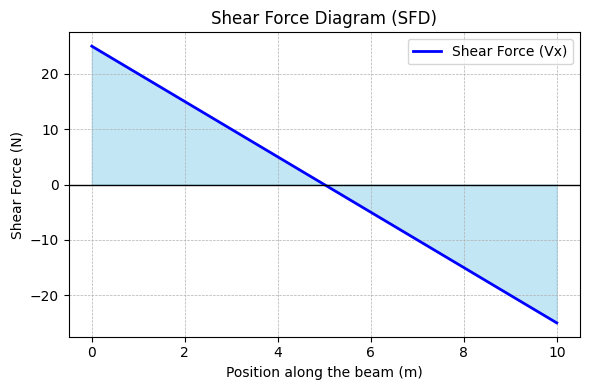

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Beam parameters
length = 10  # Length of the beam in meters
w = 500  # Uniformly distributed load in N/m

# Shear force function
def shear_force(x):
    return w * (length / 2 - x)

# Generating points for plotting
x_values = np.linspace(0, length, 100)
sf_values = [shear_force(x) for x in x_values]

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(x_values, sf_values, label='Shear Force (Vx)', lw=2, color='blue')  # Plotting SFD with a full boundary line

# Shading under the SFD
plt.fill_between(x_values, 0, sf_values, color='skyblue', alpha=0.5)

# Drawing the beam as a horizontal reference line
plt.axhline(0, color='black', lw=1)  # Beam axis

# Enhancements
plt.title('Shear Force Diagram (SFD)')
plt.xlabel('Position along the beam (m)')
plt.ylabel('Shear Force (N)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()
